In [418]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<font size='5'>**Data Analysis and Pre-Processing**</font>

In [419]:
df = pd.read_excel(r'D:\Programming\data science\corizo\major project\1788410-1767134-1729261-1613779-Red_wine.xlsx')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [420]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    1
density                 0
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64

In [421]:
df.dropna(inplace=True)
df.count()

fixed acidity           1596
volatile acidity        1596
citric acid             1596
residual sugar          1596
chlorides               1596
free sulfur dioxide     1596
total sulfur dioxide    1596
density                 1596
pH                      1596
sulphates               1596
alcohol                 1596
quality                 1596
dtype: int64

In [422]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000
mean,8.321366,0.527666,0.271128,2.536936,0.087487,15.882206,46.431078,0.996745,3.498716,0.658189,10.424217,5.636591
std,1.742121,0.179154,0.194847,1.408341,0.047107,10.467380,32.893072,0.001889,0.080297,0.169587,1.066046,0.807963
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.520000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996745,3.520000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997842,3.520000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,3.900000,2.000000,14.900000,8.000000


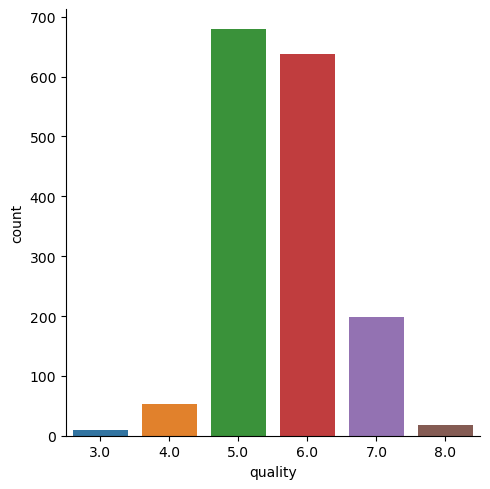

In [423]:
sns.catplot(x='quality', data = df, kind = 'count')

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

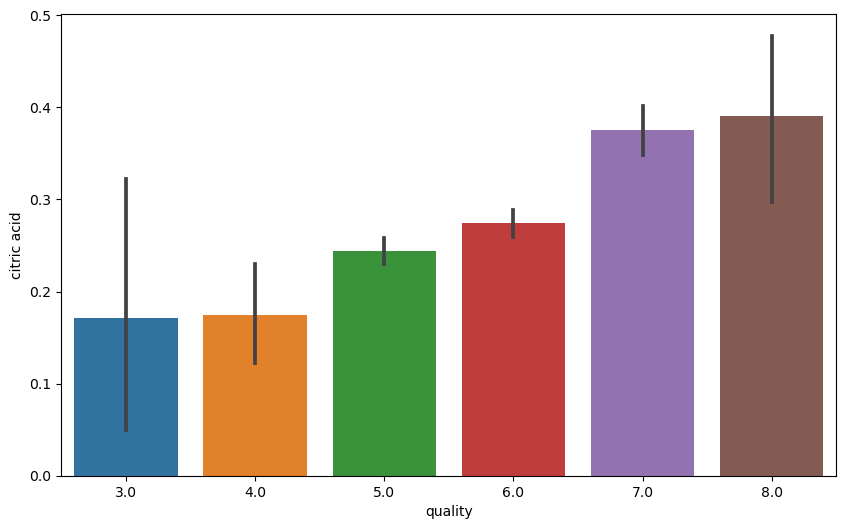

In [424]:
# Composition of citric acid is directly proportional to quality of the wine

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = df)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

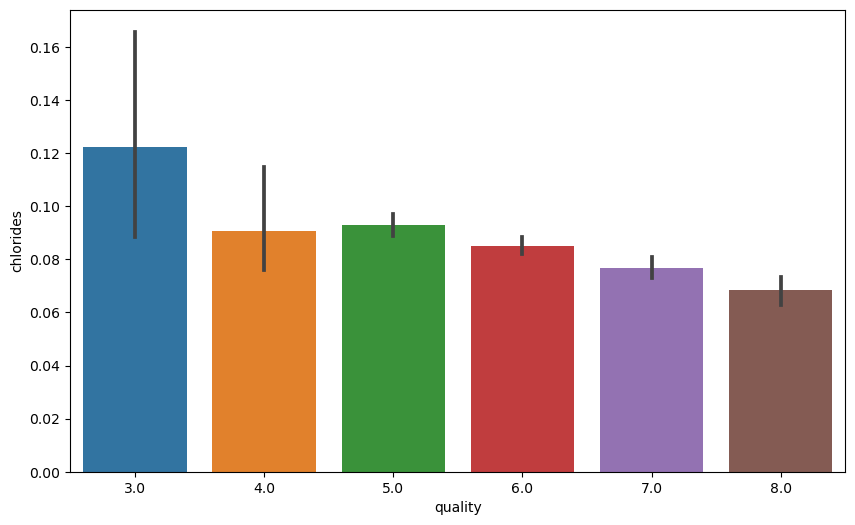

In [425]:
# Composition of chloride is indirectly proportional to quality of the wine

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = df)

Using the correlation matrix to find out which attributes of the dataset affect the quality.

Text(0.5, 1.0, 'Heatmap of correlation coefficients for each attribute')

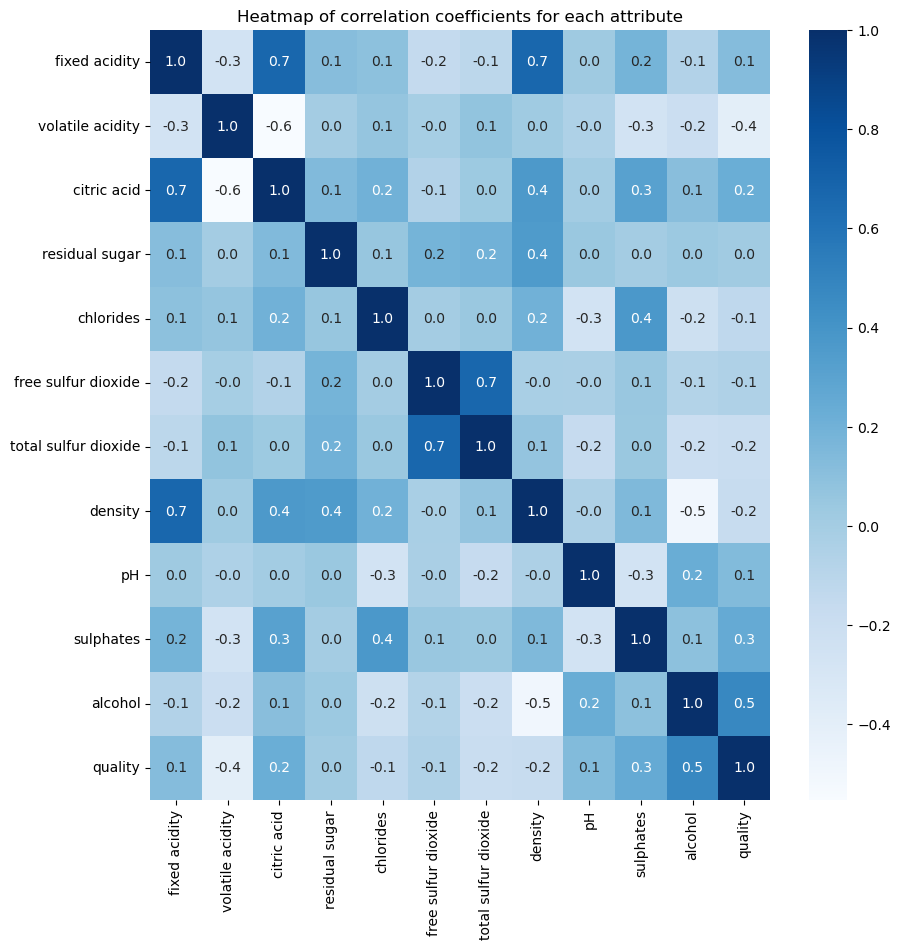

In [426]:
mat = df.corr() 
plt.figure(figsize=(10,10))
sns.heatmap(mat, cbar = True, cmap = 'Blues',fmt =  '.1f', annot = True) 
plt.title("Heatmap of correlation coefficients for each attribute")

From the above correlation plot for the given dataset for wine quality prediction we infer the following :

**Strongly Correlated** : (alcohol,quality), (fixed acidity,citric acid), (free sulphur dioxide,total sulphor dioxide), (fixed acidity,density).

**Weakly Correlated** : (citric acid,volatile acidity), (fixed acidity,ph), (density,alcohol).

In [427]:
# Redundant Columns
# df = df.drop(['volatile acidity', 'total sulfur dioxide', 'chlorides', 'density'], axis = 1)

In [428]:
df.quality.value_counts()

5.0    679
6.0    637
7.0    199
4.0     53
8.0     18
3.0     10
Name: quality, dtype: int64

In [429]:
# Label Binarization

df['quality'] = df['quality'].map({3 : 'bad', 4 :'bad', 5: 'bad', 6: 'good', 7: 'good', 8: 'good'})

c:\Users\chari\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

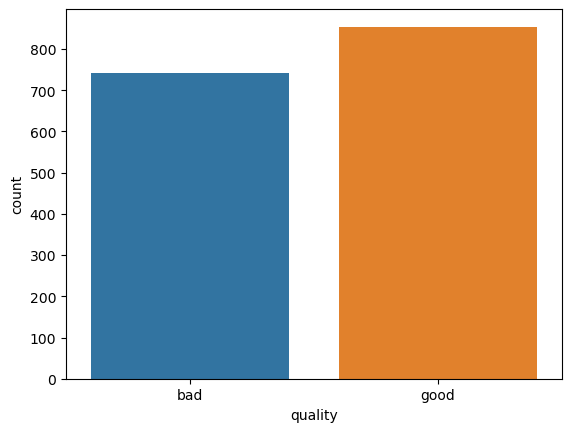

In [430]:
sns.countplot(df['quality'])

<font size='5'>**Splitting Dataset and Modelling**</font>

In [431]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tts 
scaler = StandardScaler()

x = df.iloc[:,:11]
y = df.iloc[:,11]
print(x.shape)
print(y.shape)

(1596, 11)
(1596,)


In [432]:
x_train, x_test, y_train, y_test = tts (x, y, test_size = 0.2, random_state = 10)
print('size of the training input:',x_train.shape)
print('size of the training output:',y_train.shape)
print('size of the testing input:',x_test.shape)
print('size of the testing output:',y_test.shape)

size of the training input: (1276, 11)
size of the training output: (1276,)
size of the testing input: (320, 11)
size of the testing output: (320,)


In [433]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

**Logistic Regression**

In [434]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

print("Accuracy Score:",accuracy_score(y_test,y_pred))

Accuracy Score: 0.715625


**K-Nearest Neighbors Algorithm**

In [435]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

model = KNeighborsClassifier(n_neighbors=30)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

print("Accuracy Score:",accuracy_score(y_test,y_pred))

Accuracy Score: 0.7375


c:\Users\chari\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


**Random Forest**

In [436]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(n_estimators = 200)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("Accuracy Score:",accuracy_score(y_test,y_pred))

Accuracy Score: 0.8
